# Laptop Price Prediction using ML algorithms

# Import Libraries

In [671]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

# Load Dataset

In [672]:
df_train = pd.read_csv('laptops_train.csv')
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


# data Preprocessing Part 1

In [673]:
df_train['Weight'] = df_train['Weight'].str.strip('kg')
df_train['Screen Size'] = df_train['Screen Size'].str.strip('"')
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611.20


In [674]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [675]:
df_train['Weight'] = df_train['Weight'].astype(float, errors='raise')
df_train['Screen Size'] = df_train['Screen Size'].astype(float, errors='raise')
df_train.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                 float64
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                      float64
Price                       float64
dtype: object

In [676]:
def fetch_processor(text):
    if 'Intel Core i5' in text:
        return 'Intel Core i5'
    elif 'Intel Core i7' in text:
        return 'Intel Core i7'
    elif 'Intel Core i3' in text:
        return 'Intel Core i3'
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'


In [677]:
df_train['CPU brand'] = df_train['CPU'].apply(fetch_processor)

<Axes: xlabel='CPU brand'>

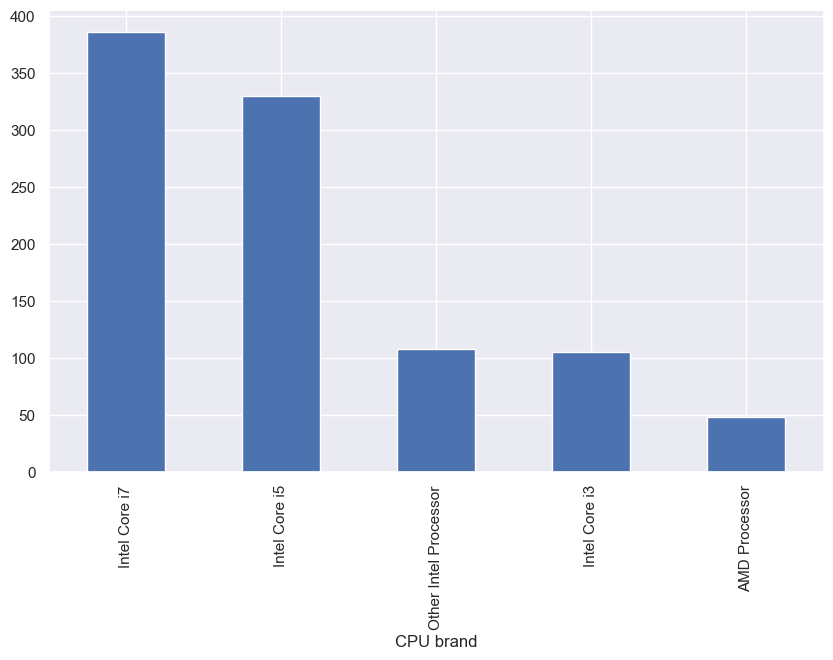

In [678]:
plt.figure(figsize=(10,6))
df_train['CPU brand'].value_counts().plot(kind='bar')

In [679]:
def gpu_type(text):
    if 'Intel' in text:
        return 'Intel'
    elif "AMD" in text:
        return 'AMD'
    elif 'Nvidia' in text:
        return 'Nvidia'
    else:
        return 'Other GPU'
    

<Axes: xlabel='GPU brand'>

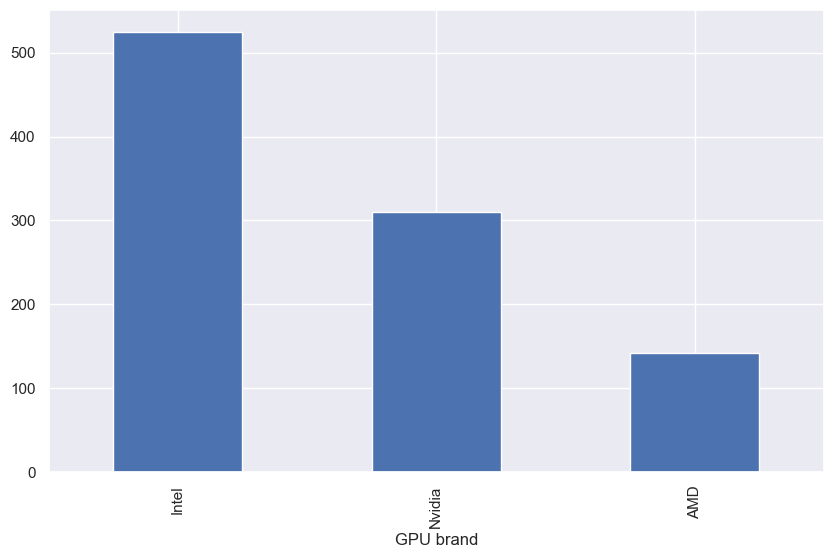

In [680]:
df_train['GPU brand'] = df_train['GPU'].apply(gpu_type)
plt.figure(figsize=(10,6))
df_train['GPU brand'].value_counts().plot(kind='bar')

In [681]:
df_train['Operating System'] = df_train['Operating System'].replace('Mac OS', 'macOS')

<Axes: xlabel='Screen Quality'>

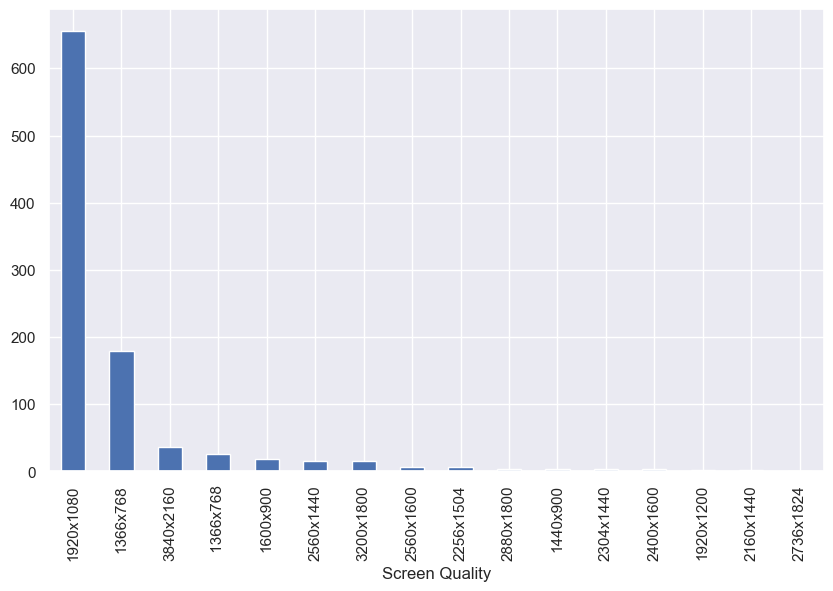

In [682]:
df_train['Screen Quality'] = df_train['Screen'].str.slice(-9)
plt.figure(figsize=(10,6))
df_train['Screen Quality'].value_counts().plot(kind='bar')

In [683]:
def fetch_storage(text):
    if '128GB SSd' in text:
        return '128SSD'
    elif '256GB SSD' in text:
        return '256GB SSD'
    elif '512GB SSD' in text:
        return '512GB SSD'
    elif '500GB SSD' in text:
        return '500GB SSD'
    elif '1TB HDD' in text:
        return '1TB HDD'
    elif 'Flash Storage' in text:
        return 'Flash Storage'
    else:
        return 'Mixed Storage'

<Axes: xlabel='Storage Type'>

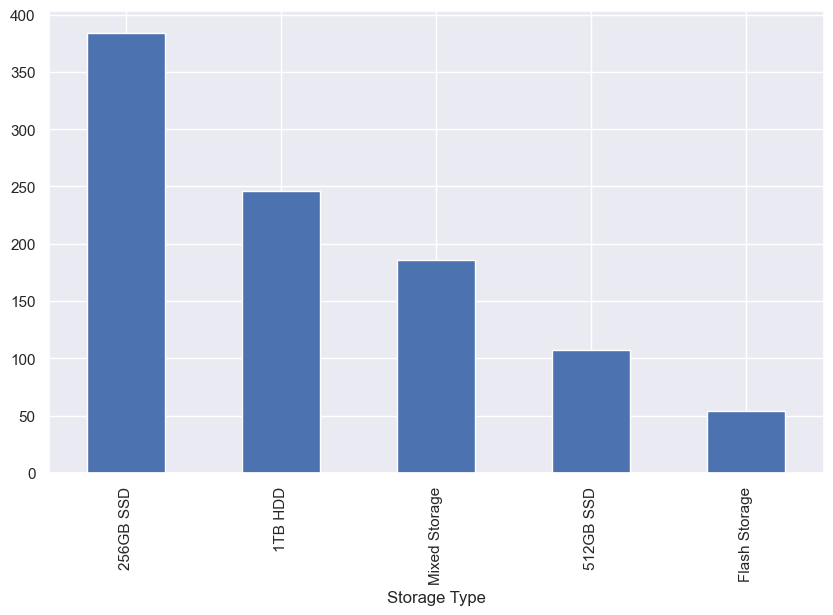

In [684]:
df_train['Storage Type'] = df_train[' Storage'].apply(fetch_storage)
plt.figure(figsize=(10,6))
df_train['Storage Type'].value_counts().plot(kind='bar')

# Exploratory Data Analysis

In [685]:
df_train.select_dtypes(include='object').nunique()

Manufacturer                 19
Model Name                  488
Category                      6
Screen                       38
CPU                         106
RAM                           8
 Storage                     36
GPU                          98
Operating System              6
Operating System Version      4
CPU brand                     5
GPU brand                     3
Screen Quality               16
Storage Type                  5
dtype: int64

C:\Users\Shehan\AppData\Local\Temp\ipykernel_15688\2739894054.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_15688\2739894054.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_15688\2739894054.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\Shehan\AppData\Local\Temp\ipykernel_15688\2739894054.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xtickla

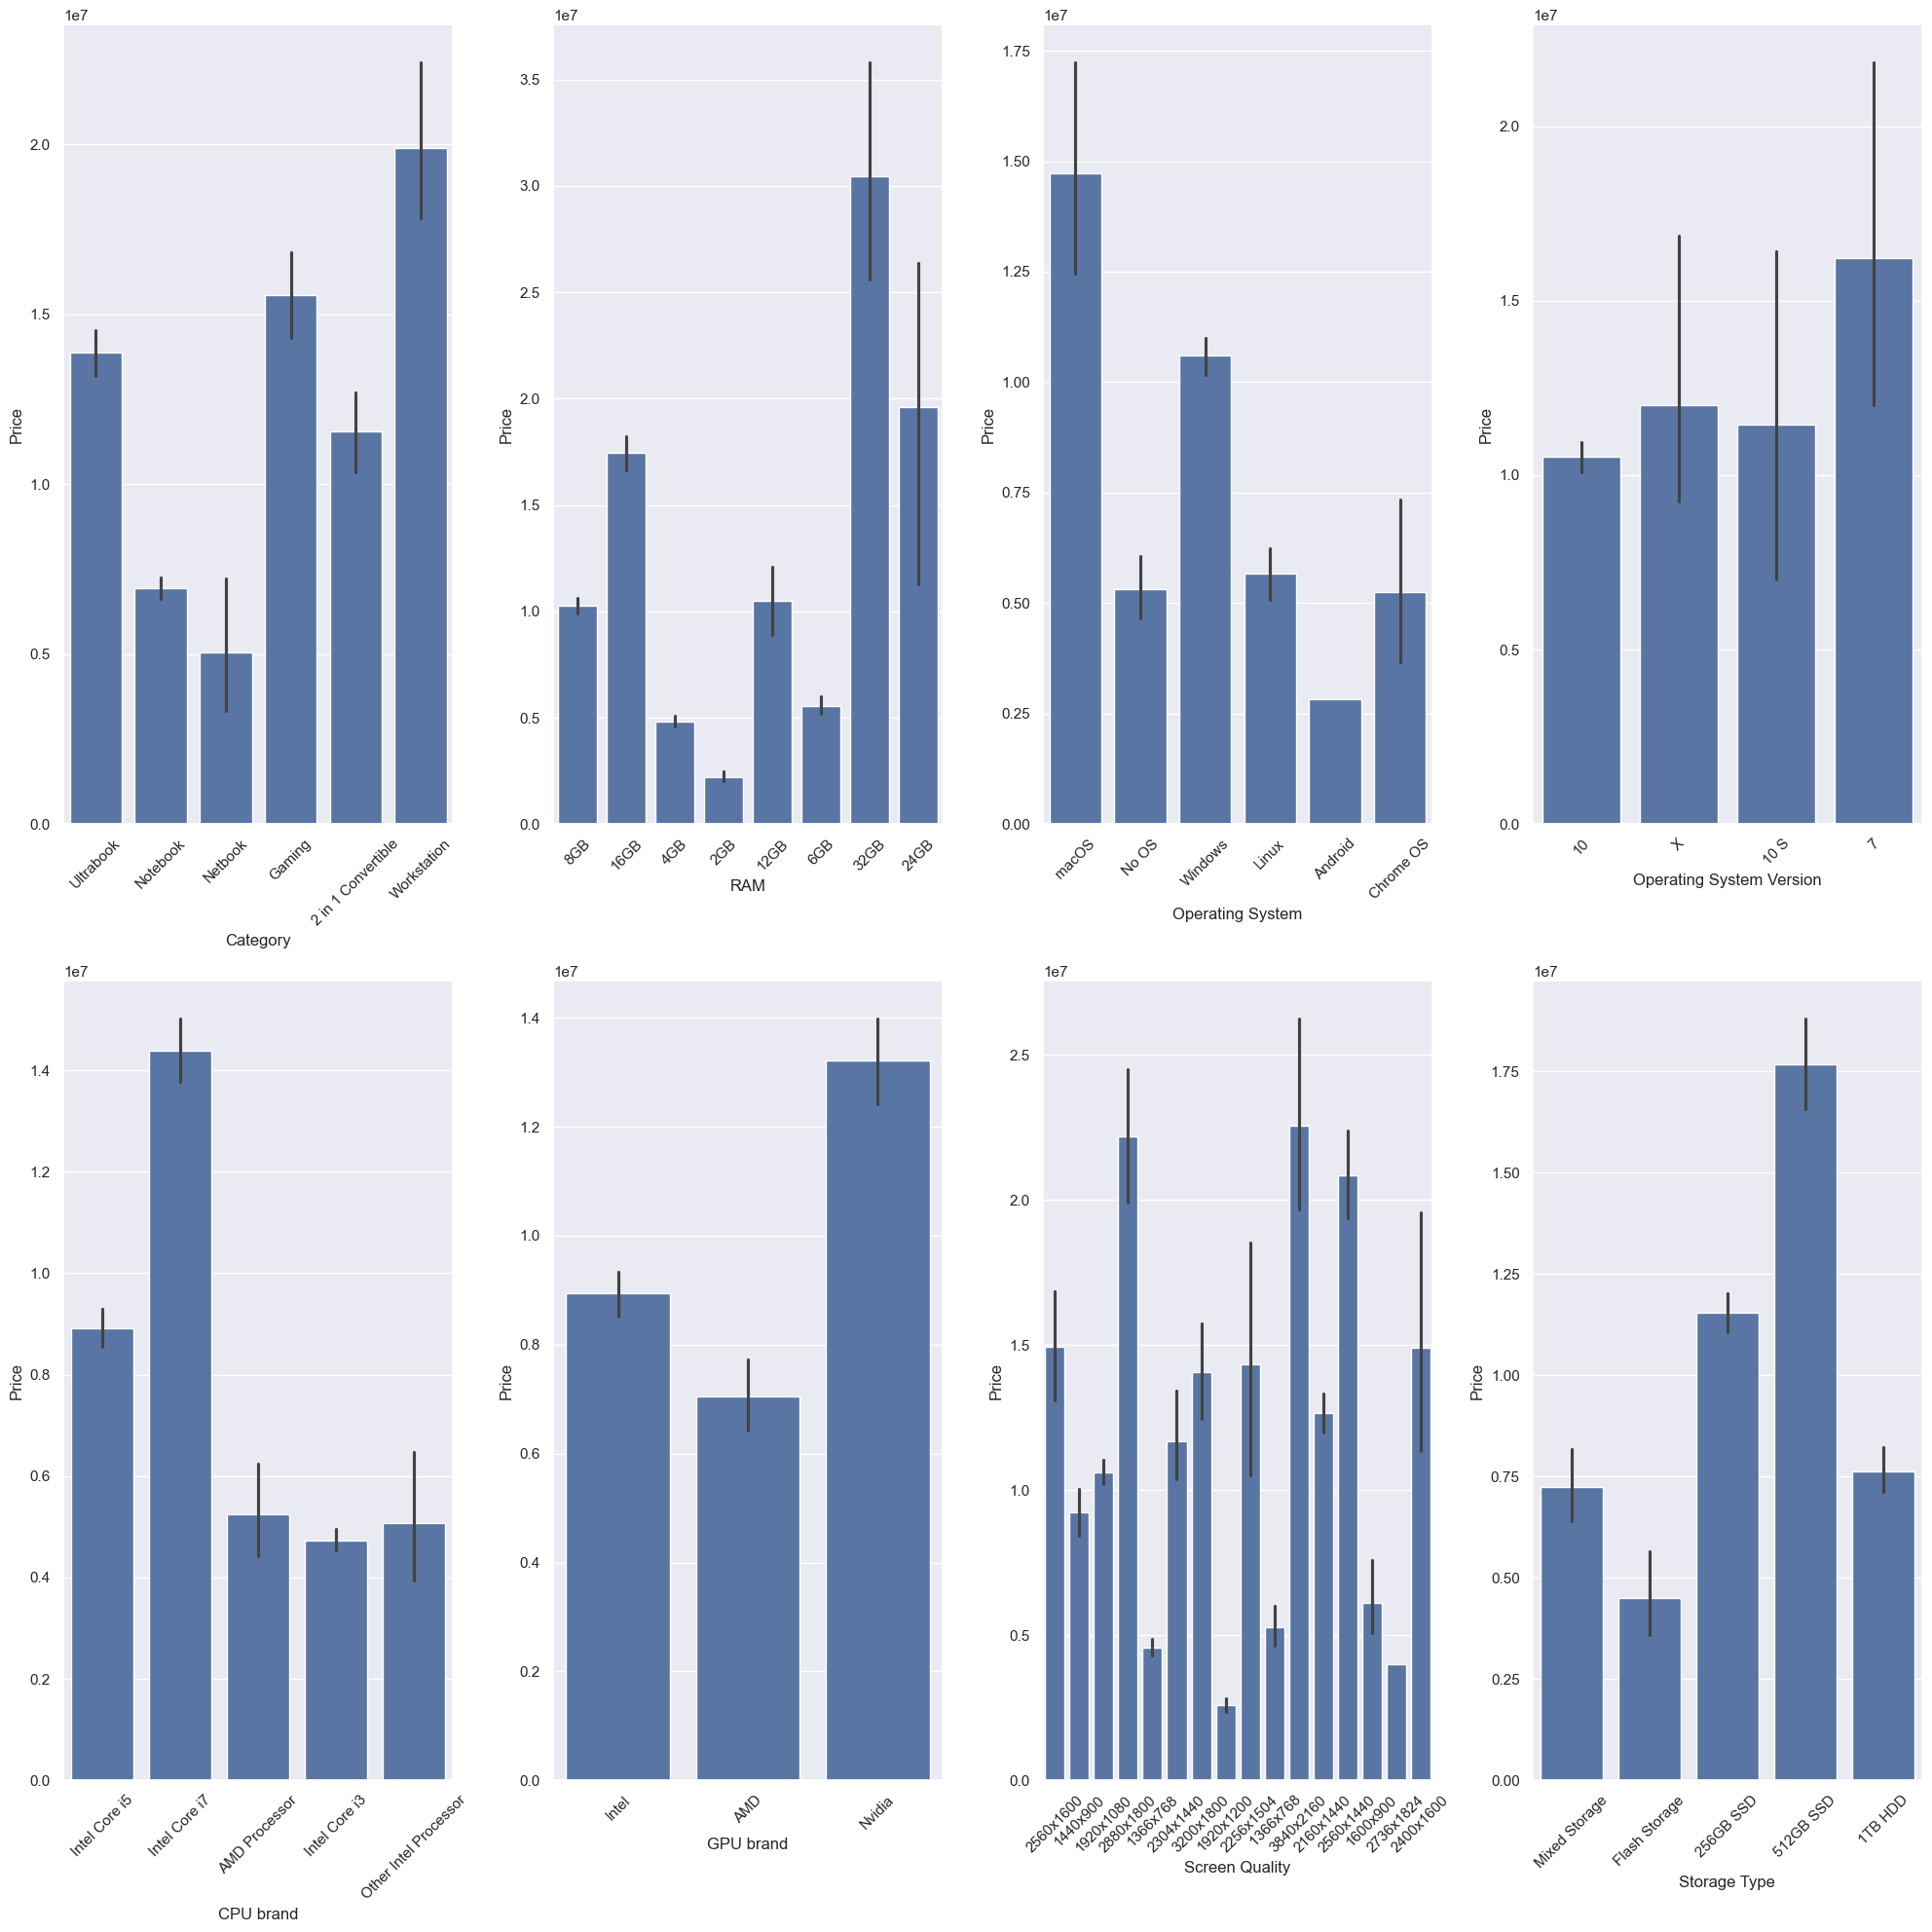

In [686]:
# list of categorical variables to plot
cat_vars = ['Category','RAM','Operating System', 'Operating System Version', 'CPU brand', 'GPU brand','Screen Quality','Storage Type']

# create figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(20,20))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df_train, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

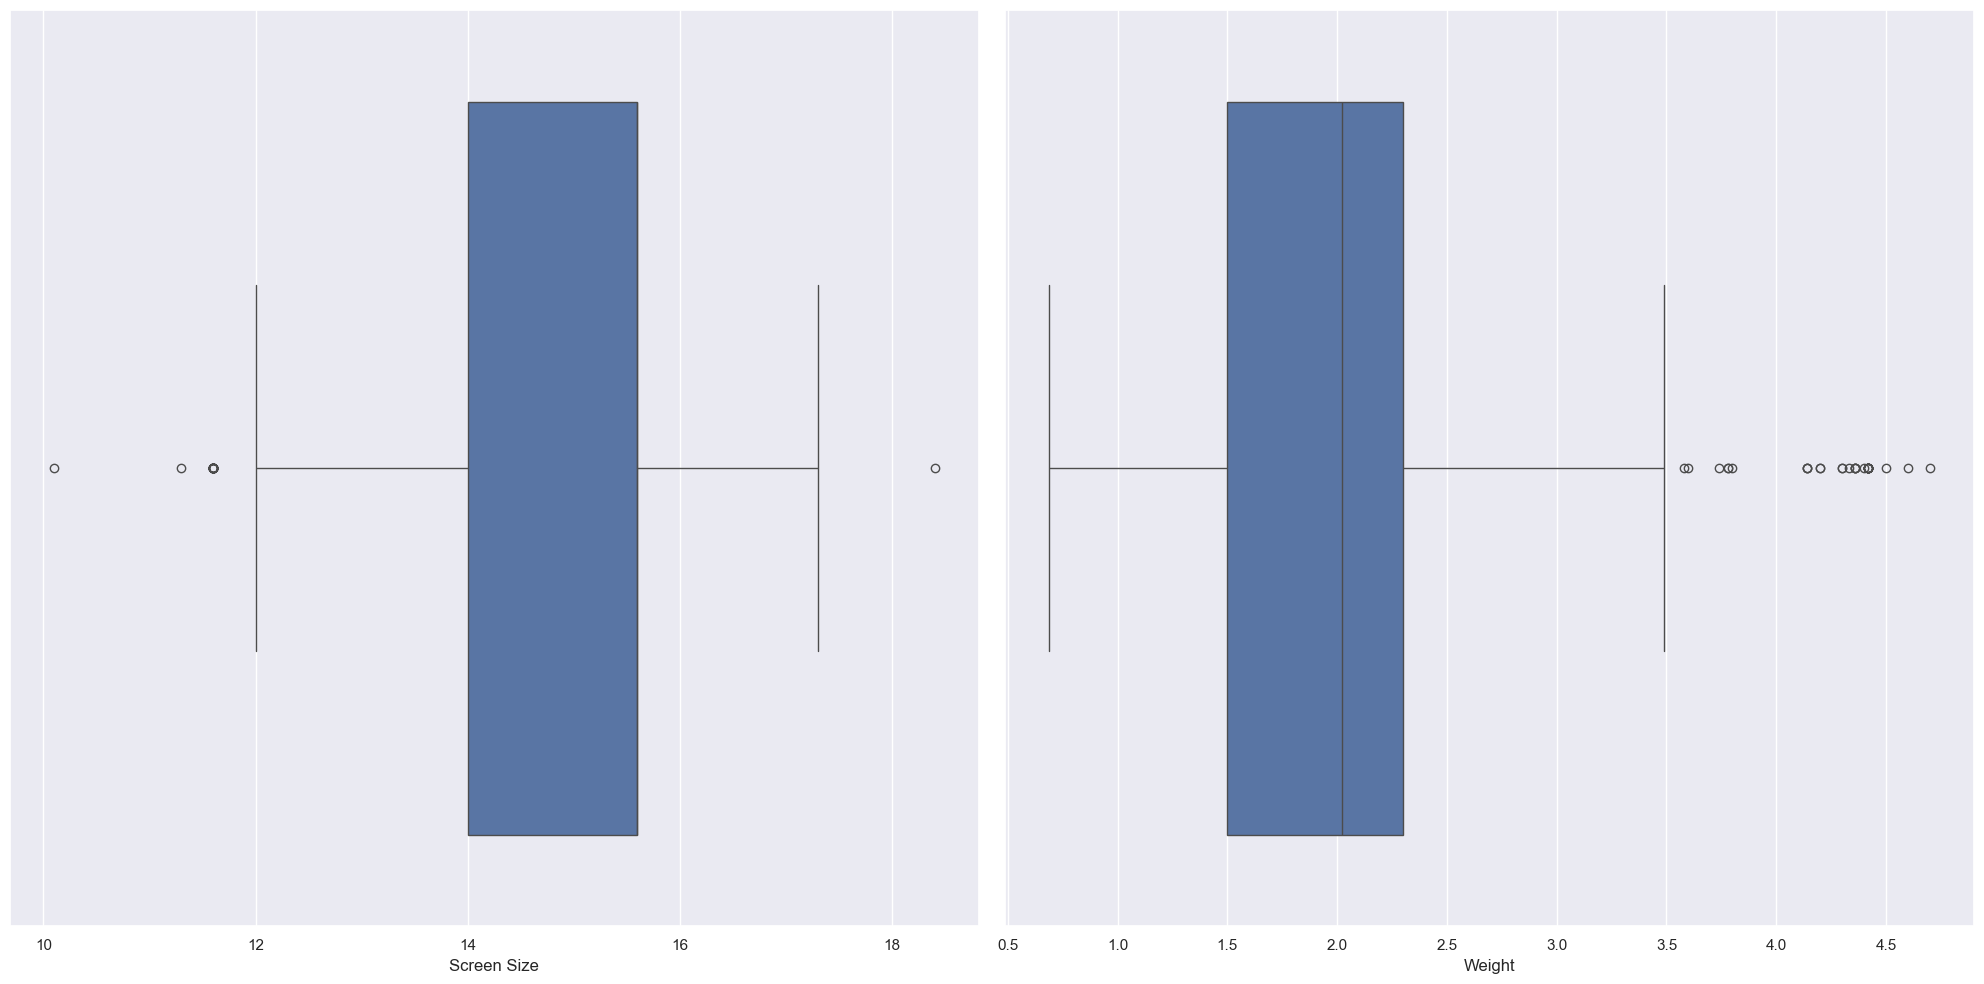

In [687]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

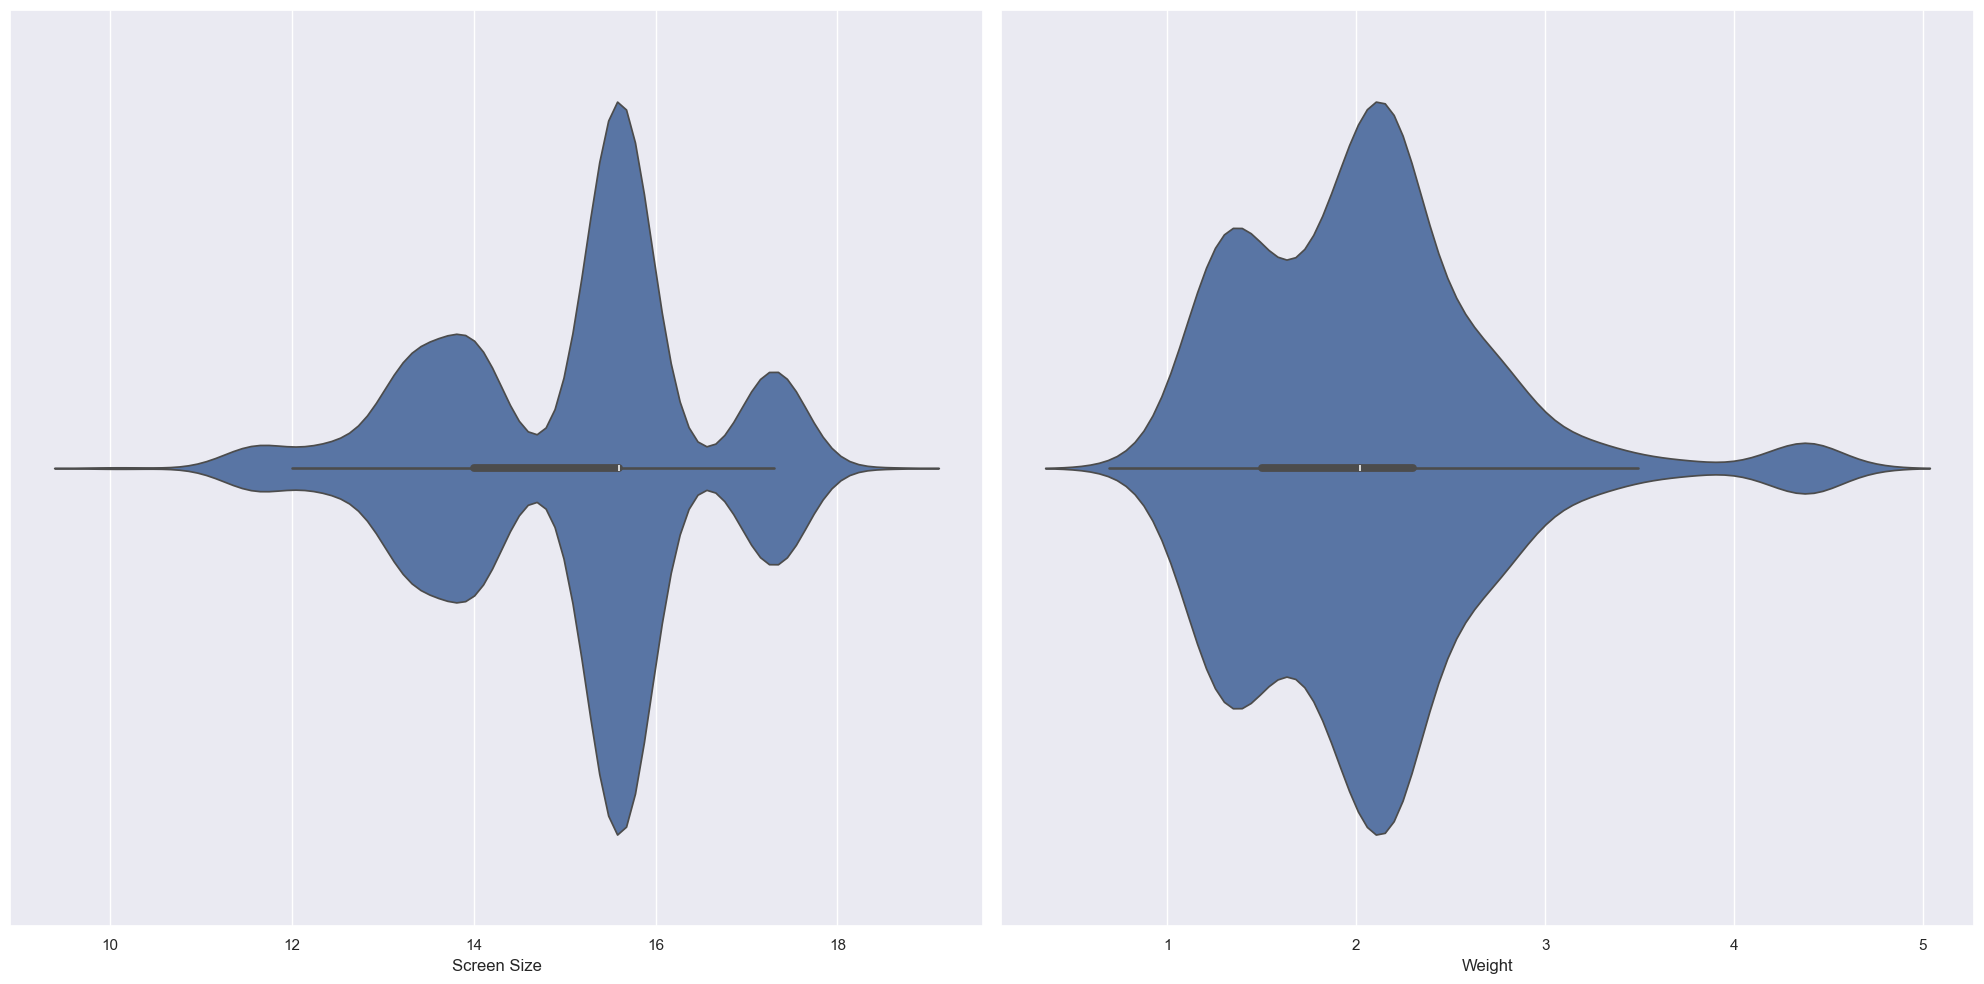

In [688]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()
plt.show()

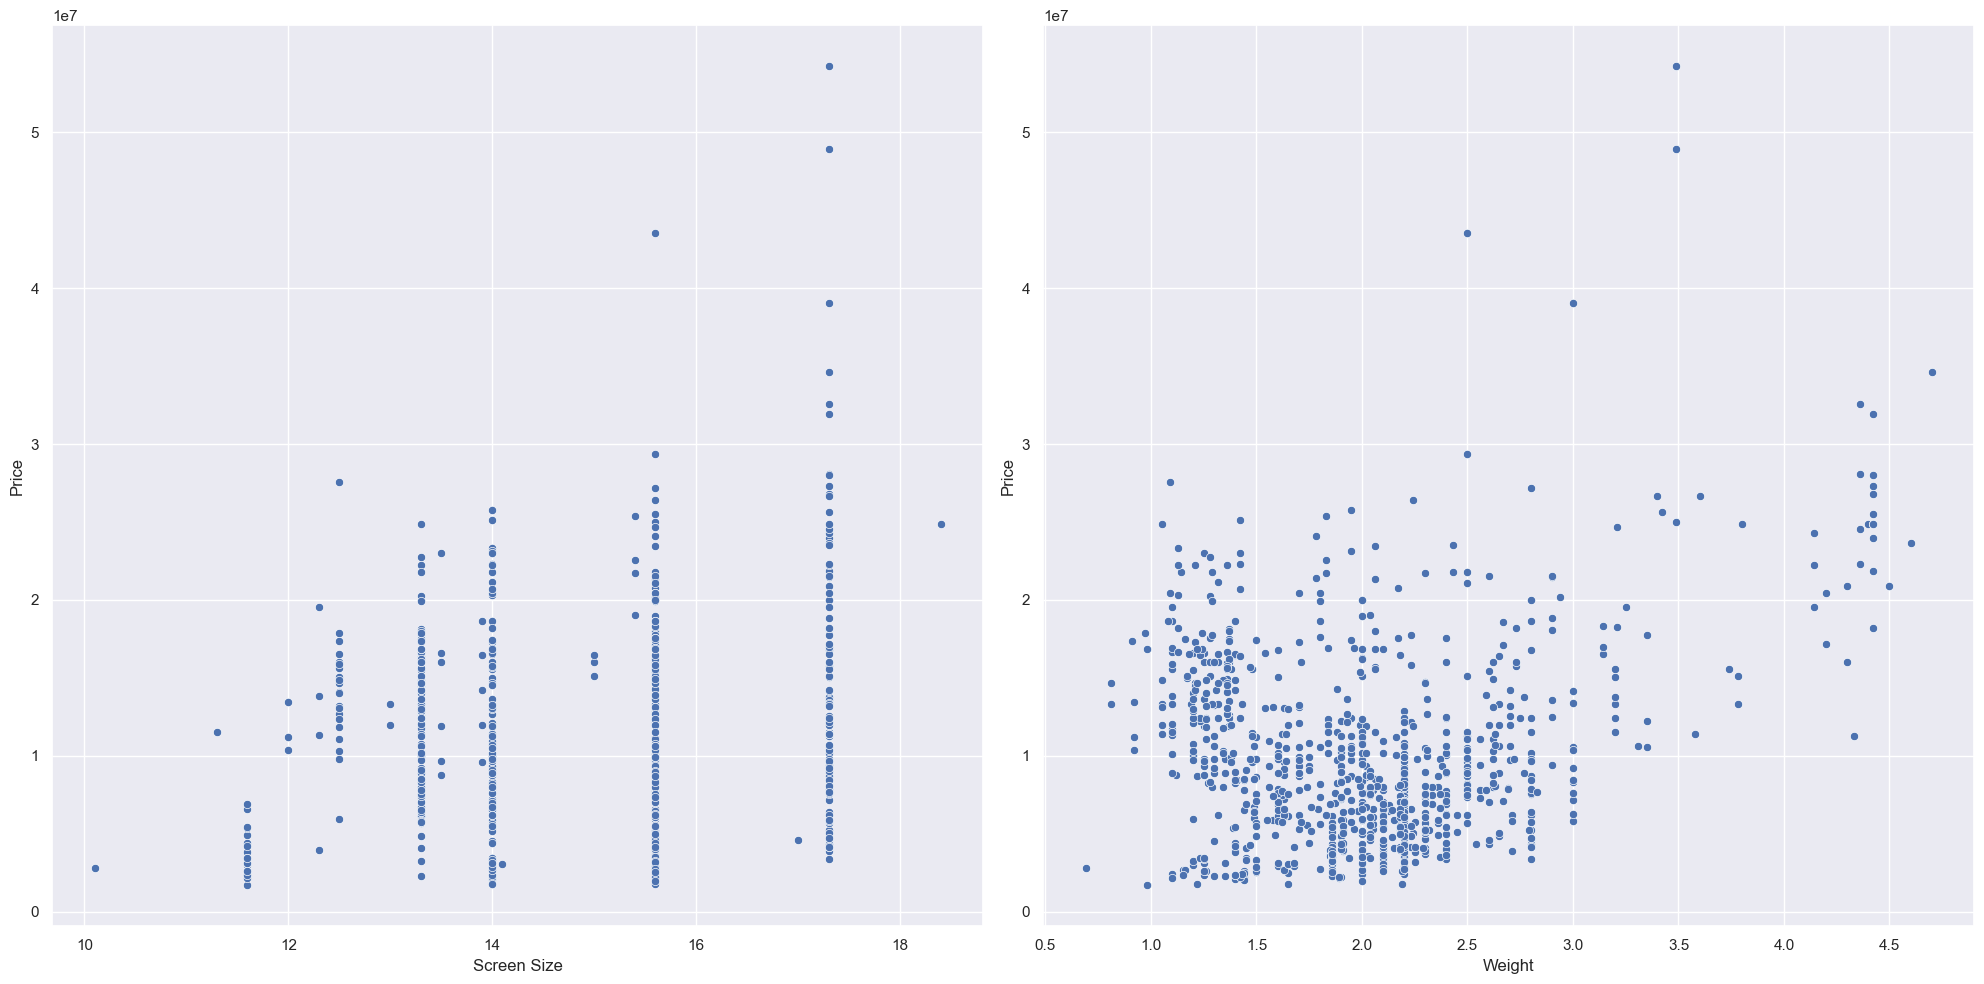

In [689]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

# Data preprocessing Part 2

In [690]:
df_train.drop(columns=['Model Name', 'Screen', 'CPU', ' Storage', 'GPU'], inplace=True)
df_train.shape

(977, 12)

In [692]:
df_train.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality,Storage Type
0,Apple,Ultrabook,13.3,8GB,macOS,NaN,1.37,11912523.48,Intel Core i5,Intel,2560x1600,Mixed Storage
1,Apple,Ultrabook,13.3,8GB,macOS,NaN,1.34,7993374.48,Intel Core i5,Intel,1440x900,Flash Storage
2,HP,Notebook,15.6,8GB,No OS,NaN,1.86,5112900.00,Intel Core i5,Intel,1920x1080,256GB SSD
3,Apple,Ultrabook,15.4,16GB,macOS,NaN,1.83,22563005.40,Intel Core i7,AMD,2880x1800,512GB SSD
4,Apple,Ultrabook,13.3,8GB,macOS,NaN,1.37,16037611.20,Intel Core i5,Intel,2560x1600,256GB SSD


In [693]:
check_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Operating System Version    13.920164
dtype: float64

In [694]:
df_train.fillna('Unknown', inplace=True)
df_train.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality,Storage Type
0,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.37,11912523.48,Intel Core i5,Intel,2560x1600,Mixed Storage
1,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.34,7993374.48,Intel Core i5,Intel,1440x900,Flash Storage
2,HP,Notebook,15.6,8GB,No OS,Unknown,1.86,5112900.00,Intel Core i5,Intel,1920x1080,256GB SSD
3,Apple,Ultrabook,15.4,16GB,macOS,Unknown,1.83,22563005.40,Intel Core i7,AMD,2880x1800,512GB SSD
4,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.37,16037611.20,Intel Core i5,Intel,2560x1600,256GB SSD


In [695]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df_train[col].unique()}")

Manufacturer: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Category: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
RAM: ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB']
Operating System: ['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']
Operating System Version: ['Unknown' '10' 'X' '10 S' '7']
CPU brand: ['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']
GPU brand: ['Intel' 'AMD' 'Nvidia']
Screen Quality: ['2560x1600' '1440x900' '1920x1080' '2880x1800' '1366x768' '2304x1440'
 '3200x1800' '1920x1200' '2256x1504' ' 1366x768' '3840x2160' '2160x1440'
 '2560x1440' '1600x900' '2736x1824' '2400x1600']
Storage Type: ['Mixed Storage' 'Flash Storage' '256GB SSD' '512GB SSD' '1TB HDD']


In [696]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df_train[col].unique())
    
    # Transform the column using the encoder
    df_train[col] = label_encoder.transform(df_train[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df_train[col].unique()}")

Manufacturer: [ 1  7  0  2  4 10  3 11 13 16  8 18 17 14 12 15  6  5  9]
Category: [4 3 2 1 0 5]
RAM: [7 1 5 3 0 6 4 2]
Operating System: [5 3 4 2 0 1]
Operating System Version: [3 0 4 1 2]
CPU brand: [2 3 0 1 4]
GPU brand: [1 0 2]
Screen Quality: [11  2  4 13  1  8 14  5  7  0 15  6 10  3 12  9]
Storage Type: [4 3 1 2 0]


In [697]:
df_train.dtypes

Manufacturer                  int64
Category                      int64
Screen Size                 float64
RAM                           int64
Operating System              int64
Operating System Version      int64
Weight                      float64
Price                       float64
CPU brand                     int64
GPU brand                     int64
Screen Quality                int64
Storage Type                  int64
dtype: object

# Remove Outlier Using Z-Score

In [699]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df_train, cols, threshold=3):
    
    # loop over each selected column
    for col in cols:
        
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df_train[col]))
        
        # remove rows with z-score greater than threshold in selected column
        df_train = df_train[(z < threshold) | (df_train[col].isnull())]
    return df_train

In [700]:
selected_cols = ['Screen Size', 'Weight']
df_clean = remove_outliers(df_train, selected_cols)
df_clean.shape

(949, 12)

<Axes: >

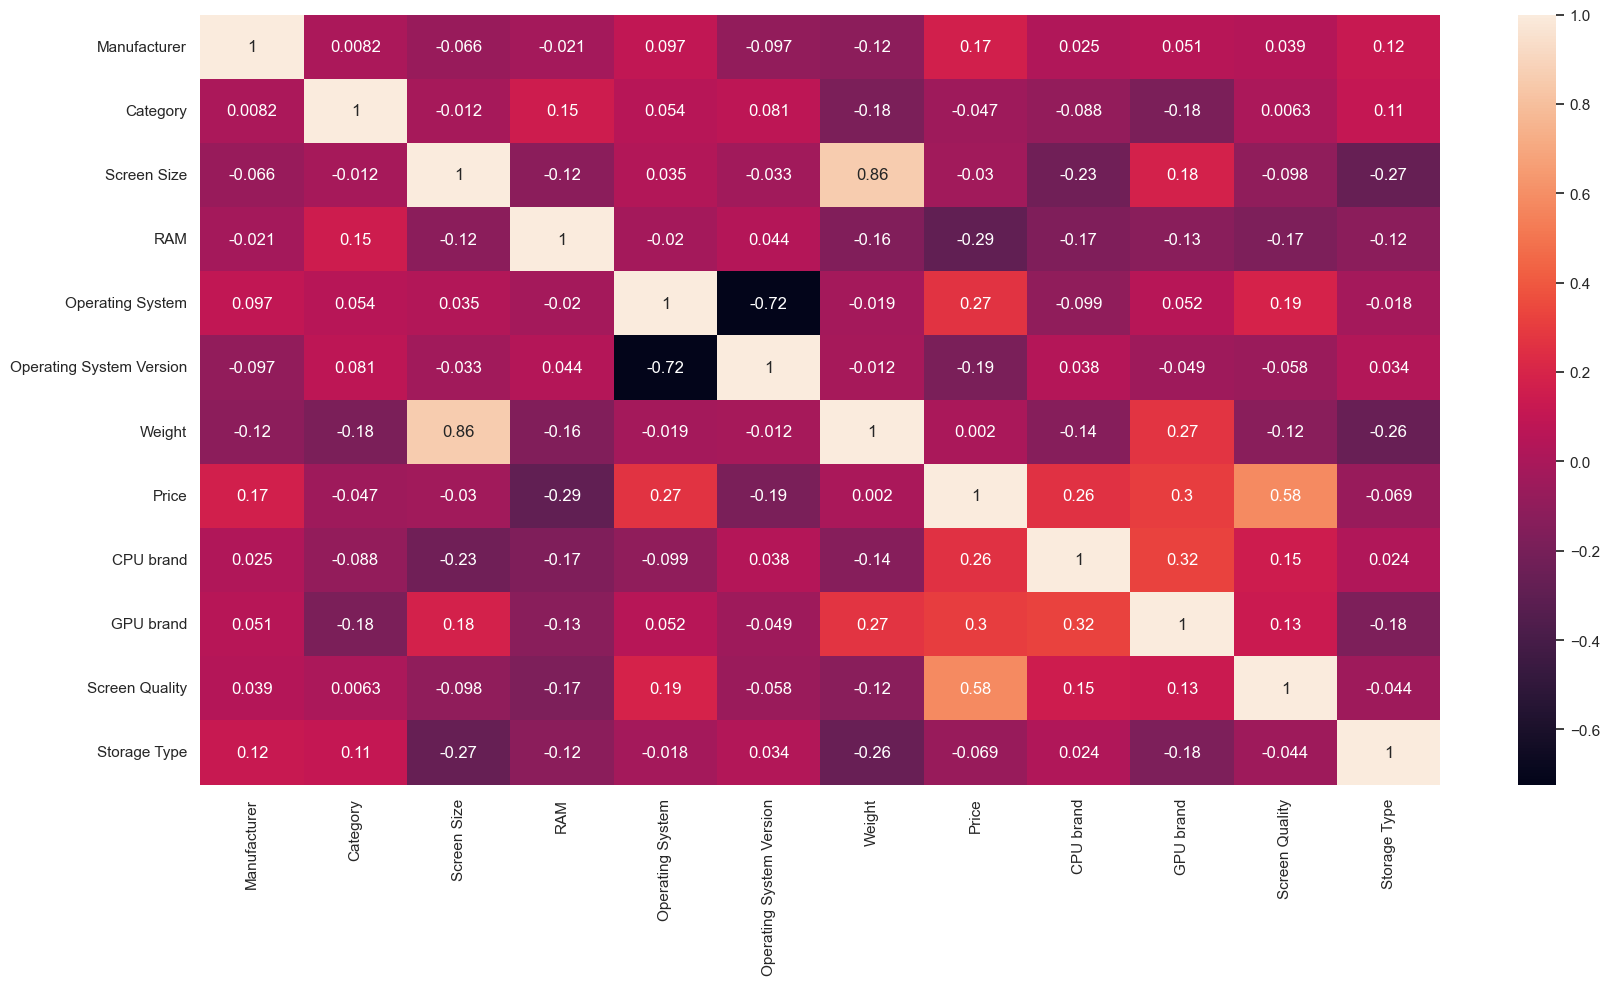

In [701]:
#Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

# Machine Learning Model Building

In [702]:
X  = df_clean.drop('Price', axis=1)
y  = df_clean['Price']

In [703]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [707]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6}


C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Shehan\AppData\Roaming\

In [708]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='sqrt', min_samples_leaf=2, min_samples_split=6)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [709]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 2415882.5772114675
MSE is 19574405461381.25
R2 score is 0.41825653046744904
RMSE score is 4424297.171459129


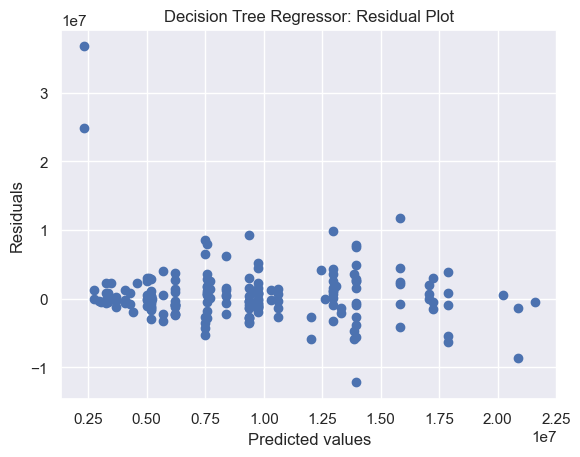

In [710]:
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Decision Tree Regressor: Residual Plot")
plt.show()

# Random Forest Regressor

In [711]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Shehan\AppData\Roaming

In [712]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=2, min_samples_leaf=1, 
                           max_features='sqrt', n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', n_estimators=150,
                      random_state=0)

In [713]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1774600.3153506569
MSE is 8168541906123.762
R2 score is 0.7572342149105992
RMSE score is 2858066.1129728546


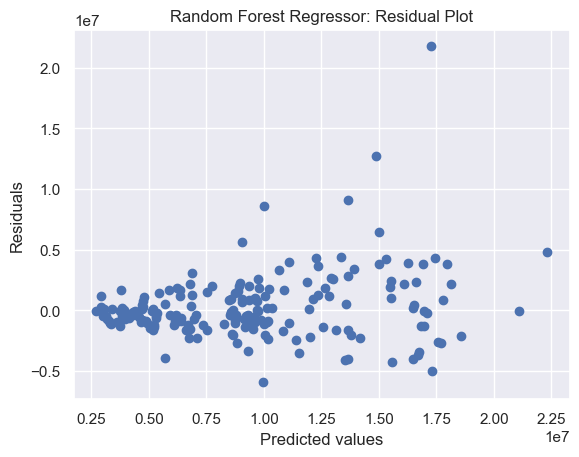

In [714]:
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor: Residual Plot")
plt.show()

# Feature Importances

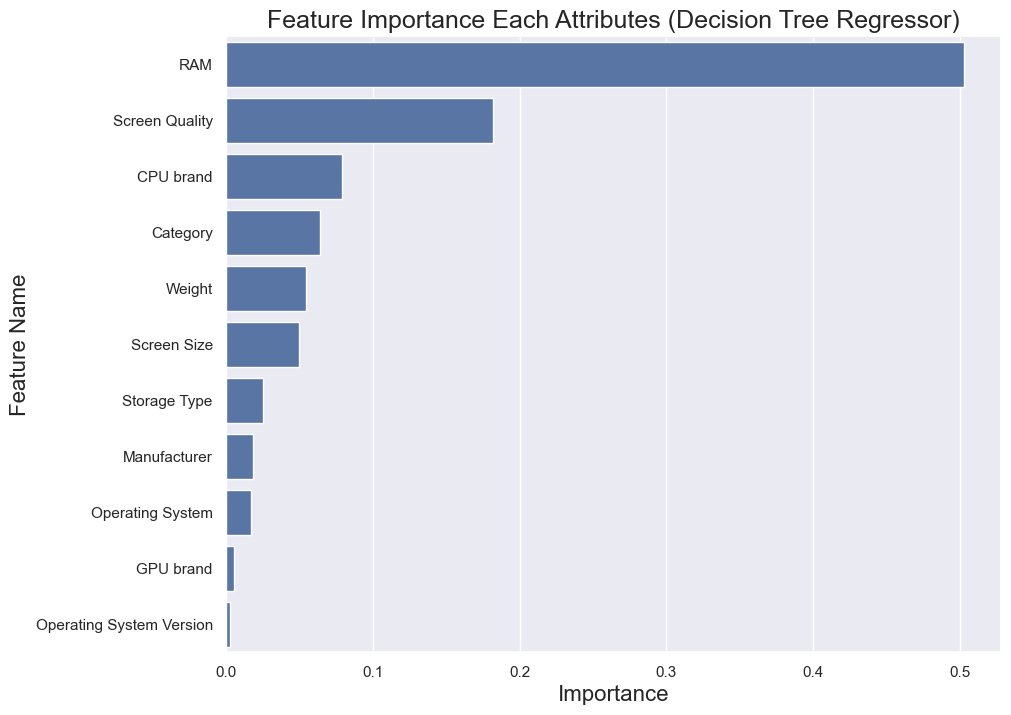

In [715]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

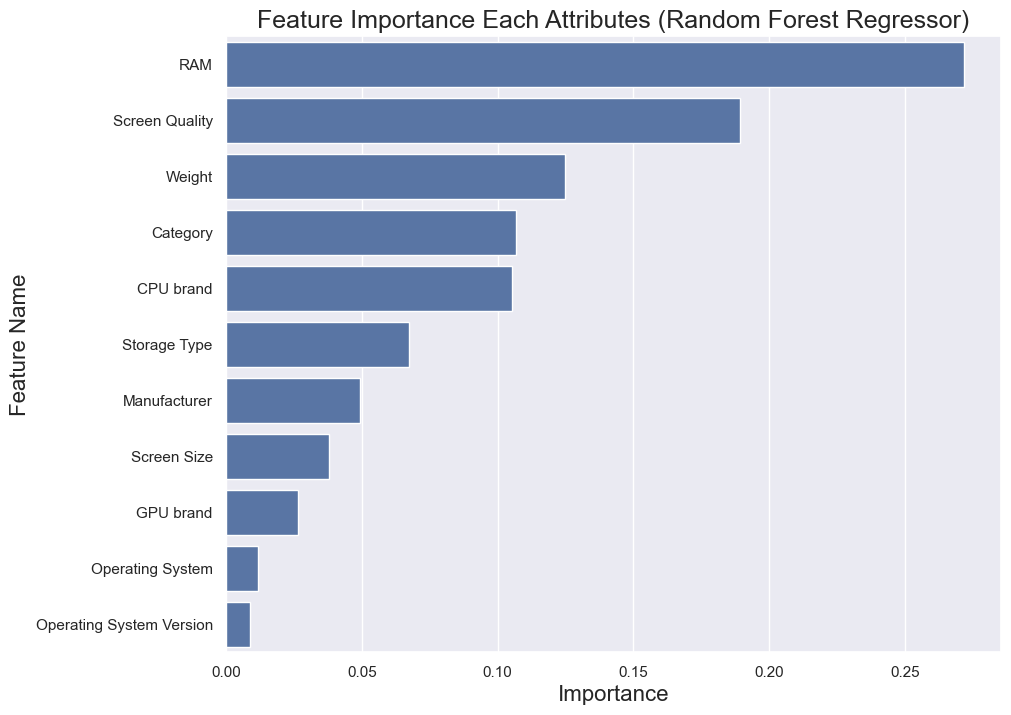

In [716]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Apply to test data

In [717]:
df_test= pd.read_csv('laptops_test.csv')
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


# Clean the data set

In [718]:
df_test['Weight'] = df_test['Weight'].str.strip('kg')
df_test['Screen Size'] = df_test['Screen Size'].str.strip('"')
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2,4881708.0


<Axes: xlabel='CPU brand'>

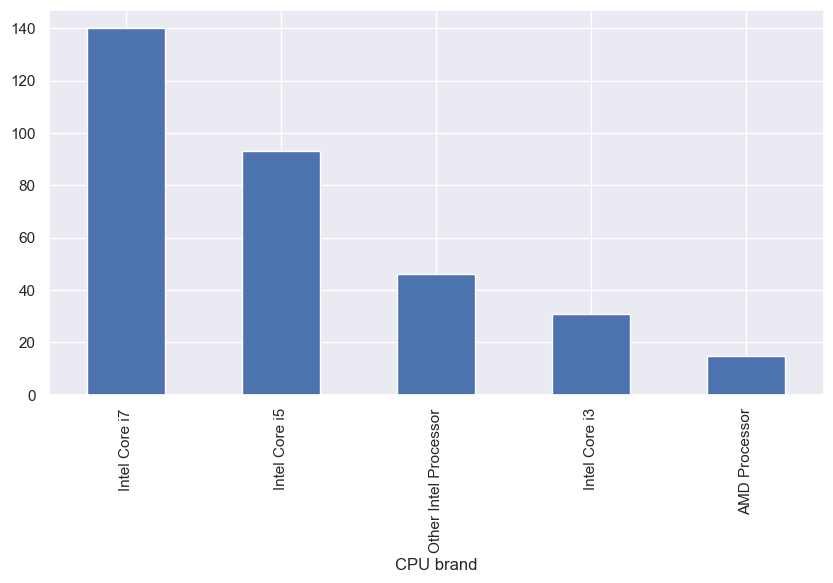

In [719]:
df_test['CPU brand'] = df_test['CPU'].apply(fetch_processor)
plt.figure(figsize=(10,5))
df_test['CPU brand'].value_counts().plot(kind='bar')

<Axes: xlabel='GPU brand'>

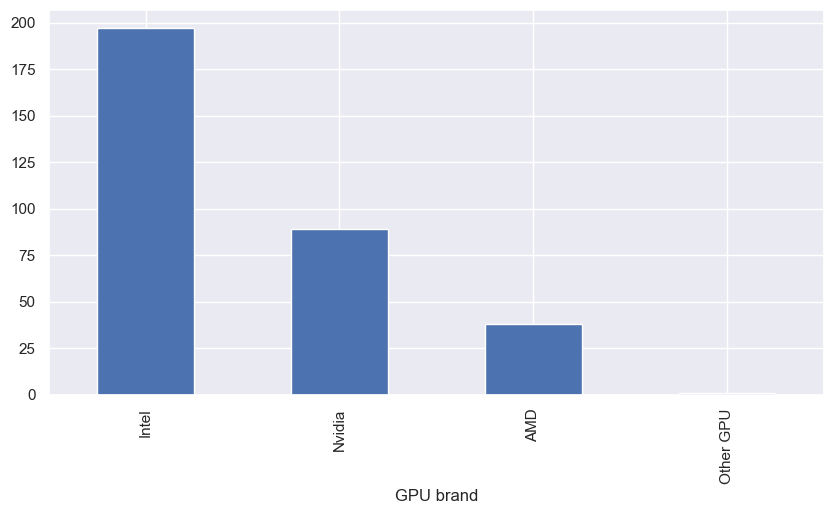

In [720]:
df_test['GPU brand'] = df_test['GPU'].apply(gpu_type)
plt.figure(figsize=(10,5))
df_test['GPU brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Screen Quality'>

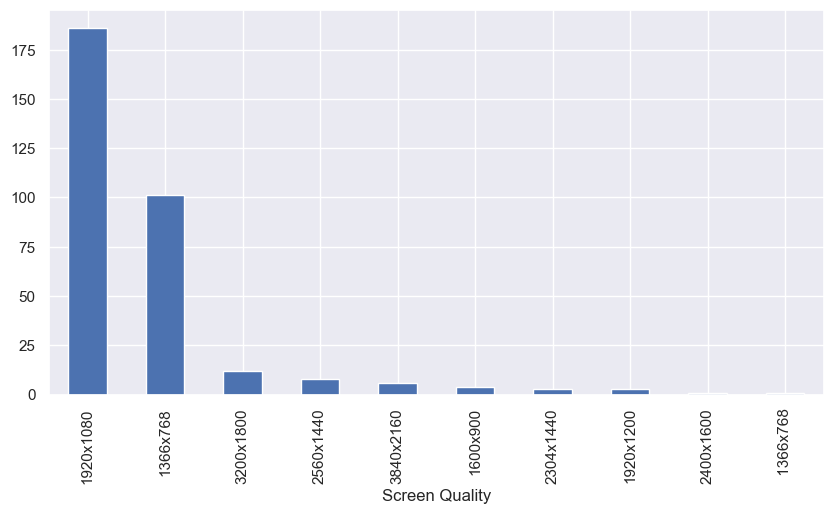

In [721]:
df_test['Operating System'] = df_test['Operating System'].replace('Mac OS', 'macOS')
df_test['Screen Quality'] = df_test['Screen'].str.slice(-9)
plt.figure(figsize=(10,5))
df_test['Screen Quality'].value_counts().plot(kind='bar')

<Axes: xlabel='Storage Type'>

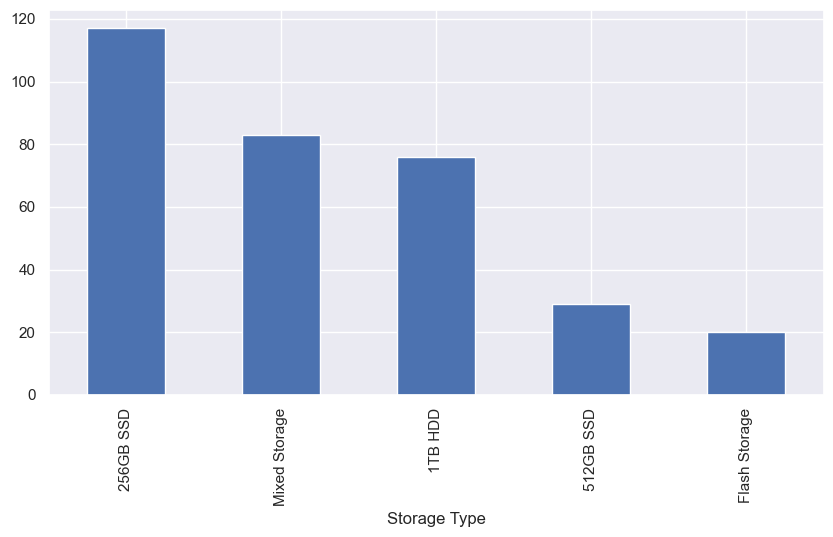

In [722]:
df_test['Storage Type'] = df_test[' Storage'].apply(fetch_storage)
plt.figure(figsize=(10,5))
df_test['Storage Type'].value_counts().plot(kind='bar')

In [723]:
df_test.drop(columns=['Model Name', 'Screen', 'CPU', ' Storage', 'GPU', 'Price'], inplace=True)
df_test.shape

(325, 11)

In [724]:
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,CPU brand,GPU brand,Screen Quality,Storage Type
0,HP,Notebook,15.6,6GB,Windows,10,2.04,Intel Core i7,Intel,1366x768,1TB HDD
1,Asus,Gaming,17.3,16GB,Windows,10,2.99,Intel Core i7,Nvidia,1920x1080,256GB SSD
2,Dell,2 in 1 Convertible,15.6,12GB,Windows,10,2.19,Intel Core i7,Intel,1920x1080,512GB SSD
3,Toshiba,Notebook,13.3,4GB,Windows,7,1.2,Intel Core i5,Intel,1920x1080,Mixed Storage
4,Lenovo,Notebook,15.6,6GB,Windows,10,2.2,AMD Processor,AMD,1920x1080,256GB SSD


In [725]:
check_missing = df_test.isnull().sum() * 100 / df_test.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Operating System Version    10.461538
dtype: float64

In [726]:
df_test.fillna('Unknown', inplace=True)
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,CPU brand,GPU brand,Screen Quality,Storage Type
0,HP,Notebook,15.6,6GB,Windows,10,2.04,Intel Core i7,Intel,1366x768,1TB HDD
1,Asus,Gaming,17.3,16GB,Windows,10,2.99,Intel Core i7,Nvidia,1920x1080,256GB SSD
2,Dell,2 in 1 Convertible,15.6,12GB,Windows,10,2.19,Intel Core i7,Intel,1920x1080,512GB SSD
3,Toshiba,Notebook,13.3,4GB,Windows,7,1.2,Intel Core i5,Intel,1920x1080,Mixed Storage
4,Lenovo,Notebook,15.6,6GB,Windows,10,2.2,AMD Processor,AMD,1920x1080,256GB SSD


In [727]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df_test.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df_test[col].unique()}")

Manufacturer: ['HP' 'Asus' 'Dell' 'Toshiba' 'Lenovo' 'Fujitsu' 'Acer' 'MSI' 'Vero'
 'Apple' 'Razer' 'Samsung']
Category: ['Notebook' 'Gaming' '2 in 1 Convertible' 'Netbook' 'Ultrabook'
 'Workstation']
Screen Size: ['15.6' '17.3' '13.3' '14.0' '12.5' '11.6' '12.0' '10.1' '12.3' '15.0']
RAM: ['6GB' '16GB' '12GB' '4GB' '8GB' '2GB' '64GB' '32GB']
Operating System: ['Windows' 'No OS' 'Chrome OS' 'macOS' 'Linux' 'Android']
Operating System Version: ['10' '7' 'Unknown' 'X']
Weight: ['2.04' '2.99' '2.19' '1.2' '2.2' '2.3' '1.75' '2.25' '2.5' '2.36' '1.6'
 '0.97' '2.1' '1.9' '1.68' '1.4' '1.11' '2.4' '1.48' '2.7' '1.34' '2.18'
 '1.64' '1.95' '1.43' '2.65' '1.26' '1.54' '1.49' '1.5' '1.47' '2.08'
 '2.09' '2.31' '1.29' '2.63' '1.84' '1.8' '1.45' '3.78' '4.6' '1.1' '1.91'
 '1.96' '2.94' '4kgs' '2.32' '3.58' '1.62' '3.21' '0.920' '2.06' '1.3'
 '3.0' '0.99' '0.69' '1.7' '1.86' '2.6' '4.3' '2.20' '2.9' '2.59' '1.16'
 '2.24' '1.23' '1.25' '1.05' '3.52' '1.35' '2' '3.35' '2.23' '3' '1.88'
 '2.8' '2.0' 

In [728]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_test.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df_test[col].unique())
    
    # Transform the column using the encoder
    df_test[col] = label_encoder.transform(df_test[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df_test[col].unique()}")

Manufacturer: [ 5  2  3 10  6  4  0  7 11  1  8  9]
Category: [3 1 0 2 4 5]
Screen Size: [8 9 5 6 4 1 2 0 3 7]
RAM: [6 1 0 4 7 2 5 3]
Operating System: [4 3 1 5 2 0]
Operating System Version: [0 1 2 3]
Weight: [48 83 55 11 57 64 36 62 71 68 31  2 53 41 34 22  7 69 27 78 19 54 33 43
 23 77 15 30 28 29 26 51 52 65 17 76 38 37 25 92 96  6 42 44 82 97 66 91
 32 86  1 49 18 85  3  0 35 39 74 95 58 81 72  9 61 12 14  4 90 20 46 89
 60 84 40 80 47 16 75 24 88 50 21 45 73 94  8 59 70 87 56  5 79 67 13 93
 63 10]
CPU brand: [3 2 0 4 1]
GPU brand: [1 2 0 3]
Screen Quality: [1 3 8 9 7 5 2 4 6 0]
Storage Type: [0 1 2 4 3]


# Price Prediction on Test Data

In [729]:
y_pred_prob = rf.predict(df_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob).to_numpy(float).round(1)
y_pred_prob_df

array([[10384412.1],
       [17427658.4],
       [15288166.8],
       [16092234.9],
       [ 8977262.7],
       [13288082.1],
       [15294495.8],
       [13953348.1],
       [10936158.8],
       [12594012.7],
       [10794732.3],
       [11946852.9],
       [ 7032656. ],
       [12522504.7],
       [10820400.6],
       [11711780. ],
       [11794901.5],
       [16069953.7],
       [13208331.9],
       [11160069.1],
       [17427658.4],
       [13894965.7],
       [12081633.7],
       [11738282.1],
       [13327839.5],
       [14482403.1],
       [16200386.9],
       [13303080. ],
       [14508930. ],
       [13204914.8],
       [11883570.7],
       [13426894.2],
       [12702996.2],
       [15831090.6],
       [14508930. ],
       [13208331.9],
       [13426894.2],
       [11664130.6],
       [12136311.8],
       [21205377.1],
       [11665933.8],
       [12614441.7],
       [13037832.7],
       [12752652.4],
       [11738282.1],
       [12991989.9],
       [11946852.9],
       [13867

In [730]:
import pandas as pd


# Load test dataset
df_test = pd.read_csv("laptops_test.csv")

# Get actual prices
y_actual_price = df_test["Price"].values.round(1)

y_actual_price

array([ 5148468. , 15552108. , 11550708. , 10625940. ,  4881708. ,
        5770908. ,  8136180. ,  5326308. ,  7166952. , 10572588. ,
        6660108. ,  9950148. , 16965936. ,  4437108. ,  2406353. ,
       11995308. ,  7904988. , 10225800. , 11995308. ,  3378960. ,
       15996708. , 18575388. , 11203920. , 10572588. ,  4863924. ,
        6926868. , 10625940. ,  9781111.1, 10714860. , 12884508. ,
        9330019.9,  6082128. ,  8438508. , 13684788. , 14138280. ,
       16781071.3,  7113600. , 10759320. ,  6846751.1, 26391456. ,
       13249080. , 19820268. ,  7077943.1, 14138280. , 10216908. ,
       10540843.6,  9304944.5, 13862628. , 10572588. ,  9425520. ,
       14440608. ,  9603360. ,  8651916. ,  3636828. , 10597485.6,
       10625940. , 10928179.1, 11995308. ,  6597864. , 15338700. ,
        9451751.4,  8985454.9,  7531524. ,  1874433.6, 12671100. ,
        9333043.2,  8892000. , 18702899.3, 13062348. , 13743830.9,
       20362591.1,  2560006.8, 23297040. ,  8705268. ,  972784

In [731]:
# Create comparison DataFrame
laptop_price_compare = pd.DataFrame({
    "Actual Price": y_actual_price.flatten(),  # Convert to 1D array if it's multi-dimensional
    "Predicted Price": y_pred_prob_df.flatten()  # Convert to 1D array if it's multi-dimensional
})



# Show comparison
print(laptop_price_compare.head(20))

    Actual Price  Predicted Price
0      5148468.0       10384412.1
1     15552108.0       17427658.4
2     11550708.0       15288166.8
3     10625940.0       16092234.9
4      4881708.0        8977262.7
5      5770908.0       13288082.1
6      8136180.0       15294495.8
7      5326308.0       13953348.1
8      7166952.0       10936158.8
9     10572588.0       12594012.7
10     6660108.0       10794732.3
11     9950148.0       11946852.9
12    16965936.0        7032656.0
13     4437108.0       12522504.7
14     2406353.0       10820400.6
15    11995308.0       11711780.0
16     7904988.0       11794901.5
17    10225800.0       16069953.7
18    11995308.0       13208331.9
19     3378960.0       11160069.1


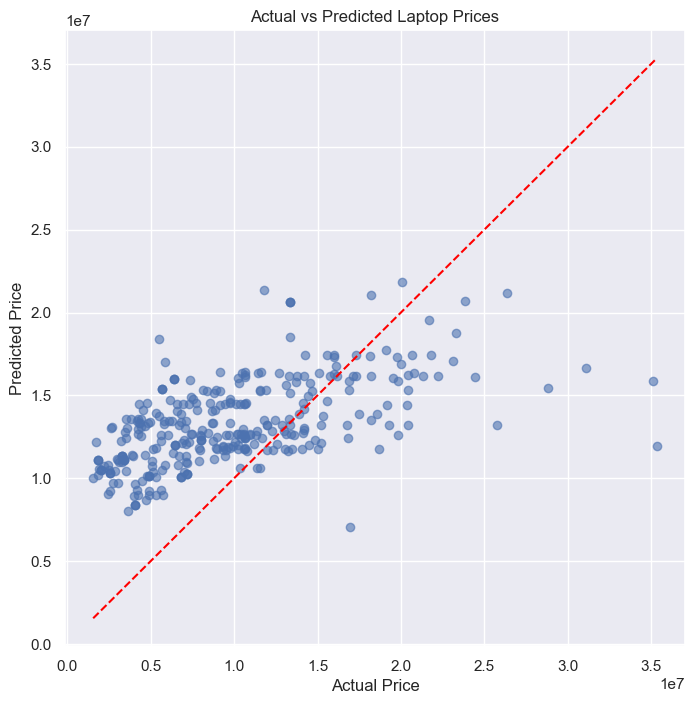

In [732]:
plt.figure(figsize=(8,8))
plt.scatter(laptop_price_compare["Actual Price"], laptop_price_compare["Predicted Price"], alpha=0.6)
plt.plot([laptop_price_compare["Actual Price"].min(), laptop_price_compare["Actual Price"].max()],
         [laptop_price_compare["Actual Price"].min(), laptop_price_compare["Actual Price"].max()],
         color="red", linestyle="--")  # Perfect prediction line
plt.title("Actual vs Predicted Laptop Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


Mean Absolute Error (MAE): 5,007,613.34
Root Mean Squared Error (RMSE): 5,956,832.31
R² Score: -0.0077


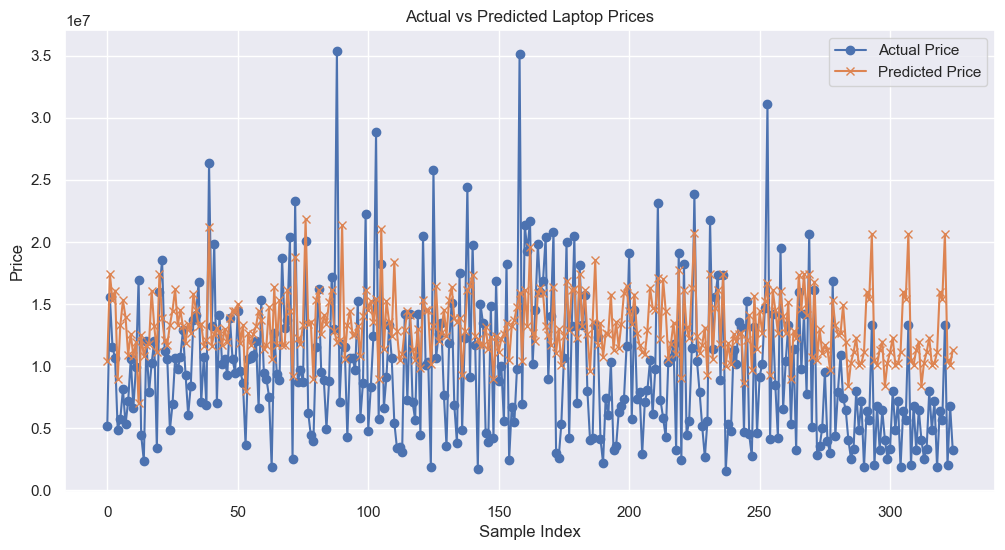

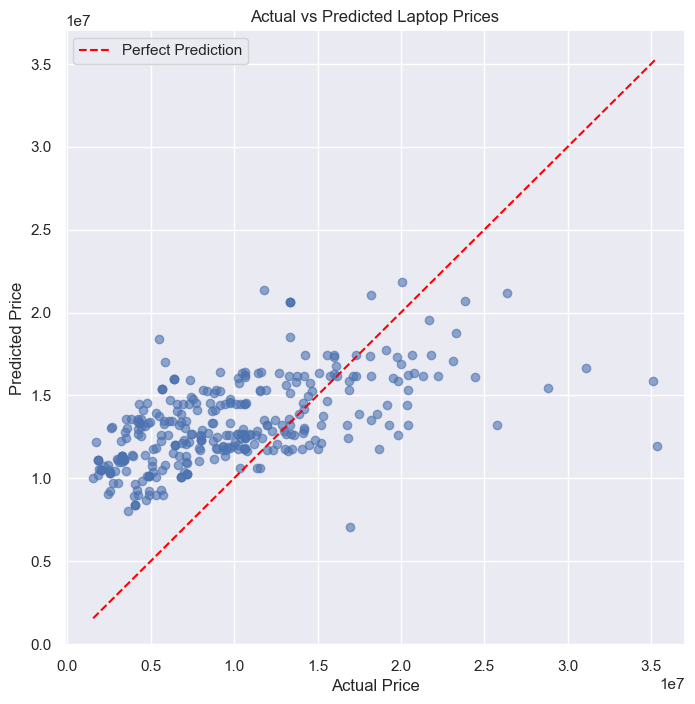

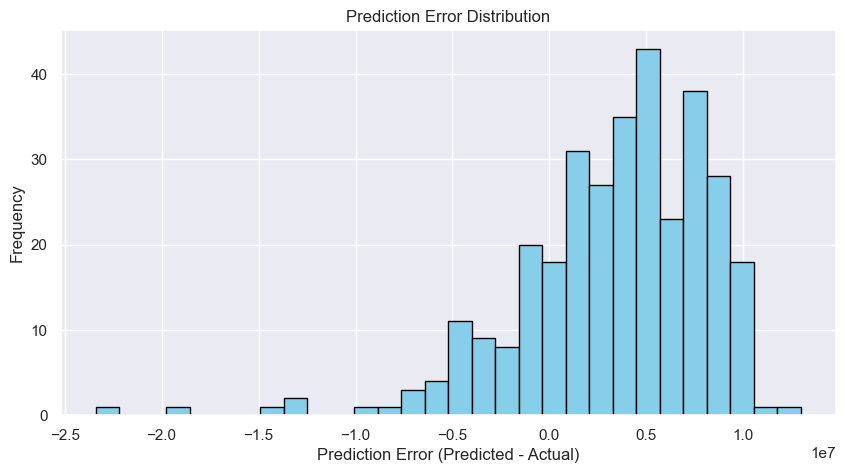

In [733]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual and Predicted
y_actual = laptop_price_compare["Actual Price"].values
y_pred = laptop_price_compare["Predicted Price"].values

# ---------- Error Metrics ----------
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# ---------- Graphs + Save ----------

# 1. Line Plot
plt.figure(figsize=(12,6))
plt.plot(y_actual, label="Actual Price", marker='o')
plt.plot(y_pred, label="Predicted Price", marker='x')
plt.title("Actual vs Predicted Laptop Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.savefig("lineplot_actual_vs_pred.png")  # save
plt.show()

# 2. Scatter Plot
plt.figure(figsize=(8,8))
plt.scatter(y_actual, y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         color="red", linestyle="--", label="Perfect Prediction")
plt.title("Actual vs Predicted Laptop Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.savefig("scatter_actual_vs_pred.png")  # save
plt.show()

# 3. Error Distribution
errors = y_pred - y_actual
plt.figure(figsize=(10,5))
plt.hist(errors, bins=30, color="skyblue", edgecolor="black")
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.savefig("error_distribution.png")  # save
plt.show()
